In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import numpy as np
import geopandas as gpd

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/_5/fqyrkr3158n4sdc3y6xyy59w0000gn/T/ipykernel_2429/201090559.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


/var/folders/_5/fqyrkr3158n4sdc3y6xyy59w0000gn/T/ipykernel_2429/1492308244.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


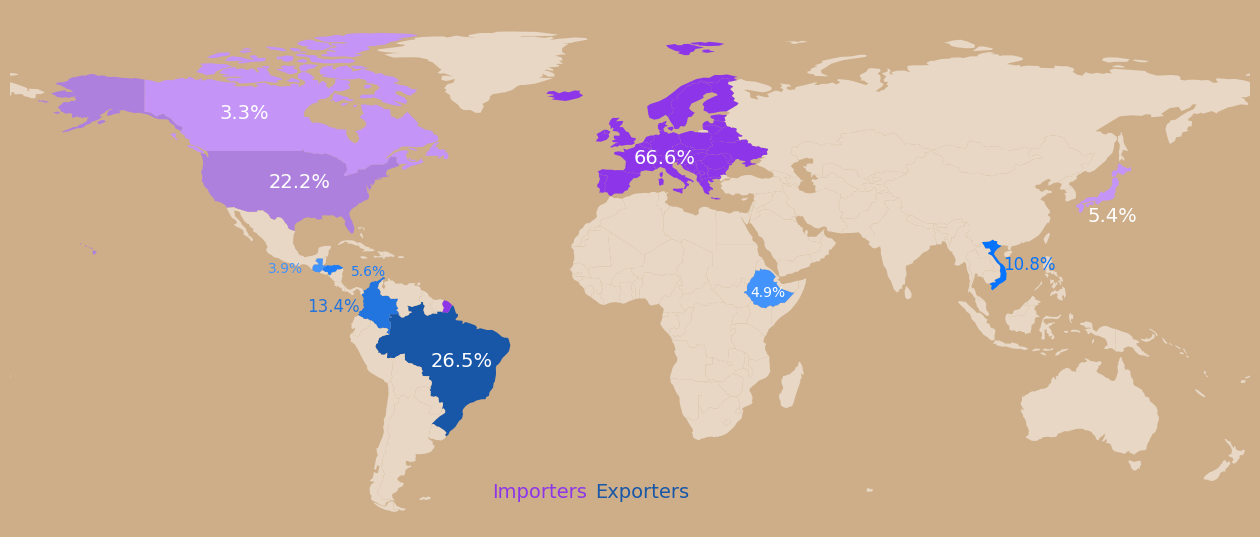

In [6]:
# Create a new map colouring only Brazil and Vietnam in blue and the others in white using geopandas
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16, 9))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['color'] = '#e7d7c4'

# Set the colors to the exporters
world.loc[world['name'].isin(['Brazil']), 'color'] = '#1856a8'
world.loc[world['name'].isin(['Colombia']), 'color'] = '#2274DE'
world.loc[world['name'].isin(['Vietnam']), 'color'] = '#0473FF'
world.loc[world['name'].isin(["Honduras"]), 'color'] = '#1D7DF9'
world.loc[world['name'].isin(["Ethiopia"]), 'color'] = '#4393FD'
world.loc[world['name'].isin(["Guatemala"]), 'color'] = '#4393FD'

# Set the colors to the importers
world.loc[world['name'].isin(['United States of America']), 'color'] = '#AE80DE'
world.loc[world['continent'].isin(['Europe']), 'color'] = '#8D35E8'
world.loc[world['name'].isin(['Japan']), 'color'] = '#c494f6' 
world.loc[world['name'].isin(['Canada']), 'color'] = '#c494f6'

world.loc[world['name'].isin(['Russia']), 'color'] = '#e7d7c4'

# Plot french guayana in green

world.plot(ax=ax, color=world['color'])

# Make the countries borders black
# world.boundary.plot(ax=ax, color='grey', linewidth=0.5)

# Add the text labels
ax.text(-49, -12, '26.5%', ha='center', va='center', fontsize=14, color='white', transform=ccrs.PlateCarree())
ax.text(-86, 4, '13.4%', ha='center', va='center', fontsize=12, color='#2274DE', transform=ccrs.PlateCarree())
ax.text(116, 16, '10.8%', ha='center', va='center', fontsize=12, color='#0473FF', transform=ccrs.PlateCarree())
ax.text(-76, 14, '5.6%', ha='center', va='center', fontsize=10, color='#1D7DF9', transform=ccrs.PlateCarree())
ax.text(40, 8, '4.9%', ha='center', va='center', fontsize=10, color='white', transform=ccrs.PlateCarree())
ax.text(-100, 15, '3.9%', ha='center', va='center', fontsize=10, color='#4393FD', transform=ccrs.PlateCarree())

# Add a text label in the US
ax.text(-96, 40, '22.2%', ha='center', va='center', fontsize=14, color='white', transform=ccrs.PlateCarree())
# Add a text label in Germany
ax.text(10, 47, '66.6%', ha='center', va='center', fontsize=14, color='white', transform=ccrs.PlateCarree())
# Add a text label in Japan
ax.text(140, 30, '5.4%', ha='center', va='center', fontsize=14, color='white', transform=ccrs.PlateCarree())
# Add a text label in Canada
ax.text(-112, 60, '3.3%', ha='center', va='center', fontsize=14, color='white', transform=ccrs.PlateCarree())

# Set the background color to #ceae89
fig.patch.set_facecolor('#ceae89')
ax.patch.set_facecolor('#ceae89')

# Remove the axes
ax.axis('off')

# Add a legend in the left bottom corner stating that orange is for the US and blue for Brazil
ax.text(-40, -50, 'Importers', ha='left', va='center', fontsize=14, color='#8D35E8', transform=ccrs.PlateCarree())
ax.text(-10, -50, 'Exporters', ha='left', va='center', fontsize=14, color='#1856a8', transform=ccrs.PlateCarree())

# Save the figure
fig.savefig('coffee-trade-2.png', dpi=300, bbox_inches='tight')
ax.set_extent([-180, 180, -60, 90])
plt.show()

In [7]:
df = pd.read_csv("../data/coffee_trade_corrected.csv")

In [16]:
df_only_coffe = df[df["product_name"].str.contains('coffee, not roasted, not decaffeinated', case=False)]

# Get the total value of coffee exports for each country. Grouping by exporter_id (column 1) and by product_name (column 6) and summing the values in column 9
# df_only_coffe = df_only_coffe.groupby(['exporter_name'], as_index=False)["value"].sum()
df_only_coffe.tail()


,year,exporter_id,exporter_name,importer_id,importer_name,hs_code,product_name,hs_revision,value,quantity,unit_abbrevation,unit_name
96280,2021,cze,Czechia,fra,France,90111,"Coffee, not roasted, not decaffeinated",5,26.0,0.005,mt,Metric Tons
96285,2021,cze,Czechia,gbr,United Kingdom,90111,"Coffee, not roasted, not decaffeinated",5,1378045.0,7.200,mt,Metric Tons
96297,2021,kor,South Korea,che,Switzerland,90111,"Coffee, not roasted, not decaffeinated",5,110.0,0.007,mt,Metric Tons
96303,2021,kor,South Korea,cze,Czechia,90111,"Coffee, not roasted, not decaffeinated",5,10.0,0.004,mt,Metric Tons
96320,2021,dnk,Denmark,are,United Arab Emirates,90111,"Coffee, not roasted, not decaffeinated",5,25901.0,9.996,mt,Metric Tons


In [14]:
#sort by value
# df_only_coffe = df_only_coffe.sort_values(by=['value'], ascending=False)
df_only_coffe.tail(100)

,exporter_name,value
8,Armenia,1340211.0
73,Ghana,1208836.0
115,Malta,1133554.0
7,Argentina,1107007.0
186,Trinidad and Tobago,978918.0
...,...,...
158,Saint Martin,68.0
184,Tokelau,28.0
68,French Polynesia,18.0
19,Bermuda,15.0


/var/folders/_5/fqyrkr3158n4sdc3y6xyy59w0000gn/T/ipykernel_3028/1144854225.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


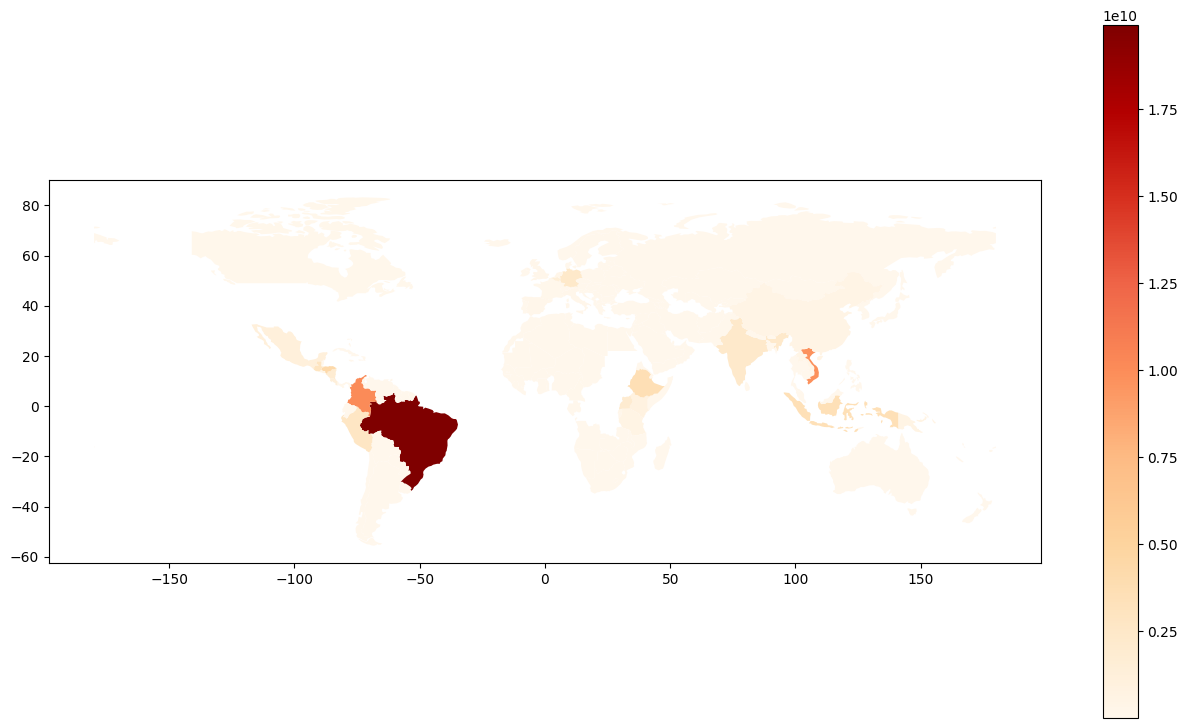

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the countries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the GeoDataFrame with df_only_coffee
merged = world.set_index('name').join(df_only_coffe.set_index('exporter_name'))

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
merged.plot(column='value', ax=ax, legend=True, cmap='OrRd')

plt.show()


In [18]:
# Drop all products that are not coffee
df_beans = df[df["product_name"].str.contains('coffee, not roasted, not decaffeinated', case=False)]
# Drop the exporter_id column
df_beans = df_beans.drop(columns=["exporter_id"])
# Drop the importer_id column
df_beans = df_beans.drop(columns=["importer_id"])
df_beans = df_beans.drop(columns=["unit_name"])
df_beans = df_beans.drop(columns=["hs_revision"])
df_beans = df_beans.drop(columns=["hs_code"])
df_beans
# Using the data in df_beans draw lines in the map between the biggest exportes and importers



,year,exporter_name,importer_name,product_name,value,quantity,unit_abbrevation
1,2018,Philippines,Slovakia,"Coffee, not roasted, not decaffeinated",584.0,0.120,mt
3,2018,Philippines,Sweden,"Coffee, not roasted, not decaffeinated",222.0,0.076,mt
8,2018,Philippines,Canada,"Coffee, not roasted, not decaffeinated",3841.0,0.555,mt
13,2018,Philippines,United States,"Coffee, not roasted, not decaffeinated",129674.0,48.896,mt
20,2018,Angola,Morocco,"Coffee, not roasted, not decaffeinated",32139.0,18.000,mt
...,...,...,...,...,...,...,...
96280,2021,Czechia,France,"Coffee, not roasted, not decaffeinated",26.0,0.005,mt
96285,2021,Czechia,United Kingdom,"Coffee, not roasted, not decaffeinated",1378045.0,7.200,mt
96297,2021,South Korea,Switzerland,"Coffee, not roasted, not decaffeinated",110.0,0.007,mt
96303,2021,South Korea,Czechia,"Coffee, not roasted, not decaffeinated",10.0,0.004,mt


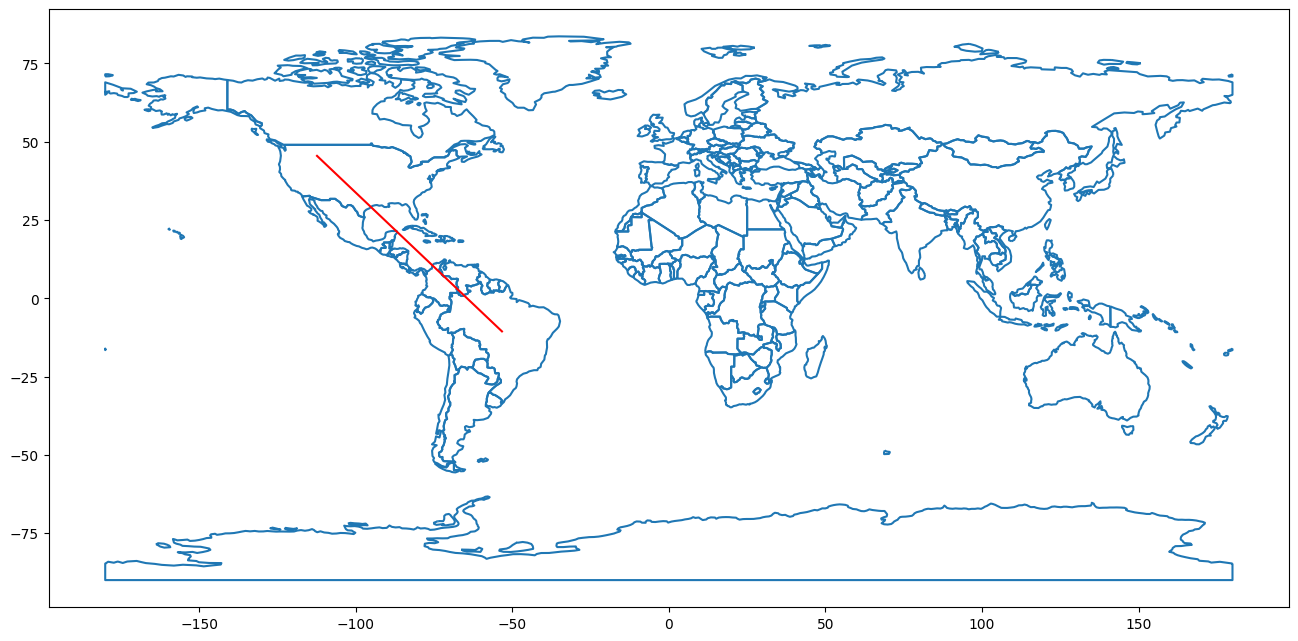

In [19]:
from shapely.geometry import LineString

country_name_mapping = {
    'United States': 'United States of America',
    'UK': 'United Kingdom',
    # Add more mappings as needed
}

# Replace the country names in the exporter_name and importer_name columns
df_beans['exporter_name'] = df_beans['exporter_name'].replace(country_name_mapping)
df_beans['importer_name'] = df_beans['importer_name'].replace(country_name_mapping)

# Determine the biggest exporters and importers
biggest_exporter = df_beans.groupby('exporter_name')['value'].sum().idxmax()
biggest_importer = df_beans.groupby('importer_name')['value'].sum().idxmax()

# Get the geometries of the biggest exporters and importers
exporter_geometry = world[world['name'] == biggest_exporter]['geometry'].values[0]
importer_geometry = world[world['name'] == biggest_importer]['geometry'].values[0]

# Create a LineString between the biggest exporter and importer
line = LineString([exporter_geometry.centroid, importer_geometry.centroid])

# Create a GeoDataFrame that contains the line
lines = gpd.GeoDataFrame(geometry=[line])

# Plot the countries and the line
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
world.boundary.plot(ax=ax)
lines.plot(ax=ax, color='red')

plt.show()

In [20]:
exporters = []
importers = []
for country in df_beans['exporter_name'].unique():
    if country in world['name'].unique():
        exporters.append(country)
        importers.append(country)

len(exporters)

152

In [21]:
biggest_importer

'United States of America'

In [22]:
world["name"].unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

In [23]:
import matplotlib.colors as mcolors
import matplotlib.collections as mcoll


Brazil
Colombia
Vietnam
Honduras
Ethiopia


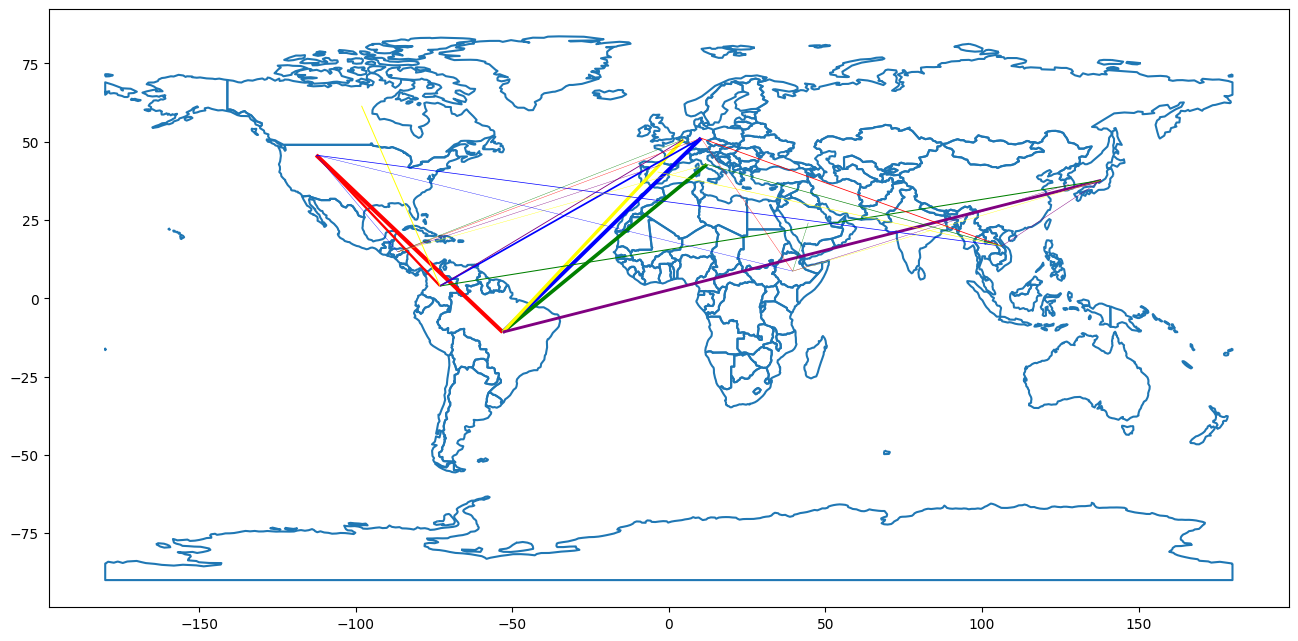

In [36]:
# Determine the major exporters
major_exporters = df_beans.groupby('exporter_name')['value'].sum().nlargest(5).index

# Create a new figure
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

# Draw the countries
world.boundary.plot(ax=ax)

colors = ['red', 'blue', 'green', 'yellow', 'purple']

# Draw a line between each major exporter and each major importer
value = 3
iter = 1
for exporter in major_exporters:
    print(exporter)
    major_importers = df_beans[df_beans["exporter_name"] == exporter].groupby('importer_name')['value'].sum().nlargest(5).index
    # print(major_importers)
    for i, importer in enumerate(major_importers):
        # Get the geometries of the exporter and importer
        exporter_geometry = world[world['name'] == exporter]['geometry'].values[0]
        importer_geometry = world[world['name'] == importer]['geometry'].values[0]

        # Reduce the linewidth each iteration, so the thicker lines represent the biggest trade flows
        # value = df_beans[(df_beans["exporter_name"] == exporter) & (df_beans["importer_name"] == importer)]['value'].sum()
        if value > 1:
            value = value - (0.0625 * iter)
        else: 
            value = value - 0.0625
        iter = iter + 1
        if value < 0.25:
            value = 0.25
        # print(value)

        # Create a LineString between the exporter and importer
        line = LineString([exporter_geometry.centroid, importer_geometry.centroid])

        # Create a GeoDataFrame that contains the line
        lines = gpd.GeoDataFrame(geometry=[line])

        # Plot the line
        color = colors[i % len(colors)]
        lines.plot(ax=ax, color=color, linewidth=value)

plt.show()

In [77]:
df_beans[df_beans["exporter_name"] == "Brazil"].groupby('importer_name')['value'].sum().nlargest(5).index

Index(['United States of America', 'Germany', 'Italy', 'Belgium', 'Japan'], dtype='object', name='importer_name')